In [1]:
import geopandas as gpd

import pandas as pd

In [2]:
confirmed = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

world = gpd.read_file(r'https://raw.githubusercontent.com/oderofrancis/africa-corona/main/world.geojson')


In [14]:
confirmeds = confirmed[['Country/Region',confirmed.columns[-1]]].groupby('Country/Region').sum()

confirmeds = confirmeds.reset_index()

confirmeds.columns = ['country','confirmed']

In [16]:
world = world[['NAME', 'geometry']]

world.columns = ['country','geometry']

In [18]:
geo_data_con = pd.merge(left=confirmeds, 
	                right=world, how='left', 
	                left_on='country', right_on='country'
	            )

geo_data_con = gpd.GeoDataFrame(geo_data_con)

In [21]:
kenya = geo_data_con[geo_data_con['country']=='Kenya']

In [24]:
kenya

,country,confirmed,geometry
91,Kenya,336740,"MULTIPOLYGON (((41.13805 -2.12444, 41.09750 -2..."


<AxesSubplot:>

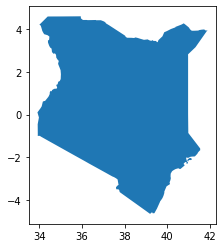

In [23]:
kenya.plot()